# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [1]:
import numpy as np
import seaborn as sns 
sns.set(style='darkgrid', color_codes=True)
import scipy.stats as stats
from scipy import stats 
from math import sqrt
import scipy
import pandas as pd
import sklearn 
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols 
import matplotlib.pyplot as plt  
plt.style.use('seaborn')
sns.set(style="white") 



## Step 1: Read in Data

In [2]:
h = pd.read_csv('kc_house_data_train.csv') 
htest = pd.read_csv('kc_house_data_test_features.csv')

In [3]:
numerical = ['price','sqft_living', 'sqft_lot','sqft_above', 
              'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

categorical = ['bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition',
       'grade','zipcode']
hfil = h[numerical + categorical]

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [4]:
h.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [5]:
h.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,...,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,...,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,...,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,...,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,...,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


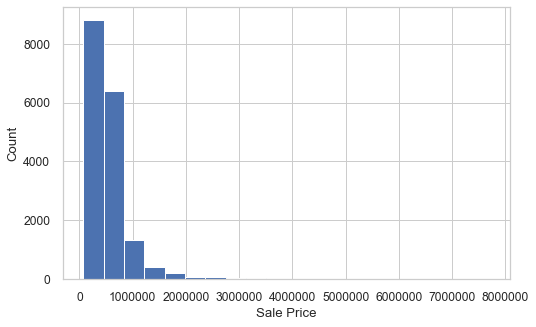

In [6]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    h['price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

In [7]:
h.keys()

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

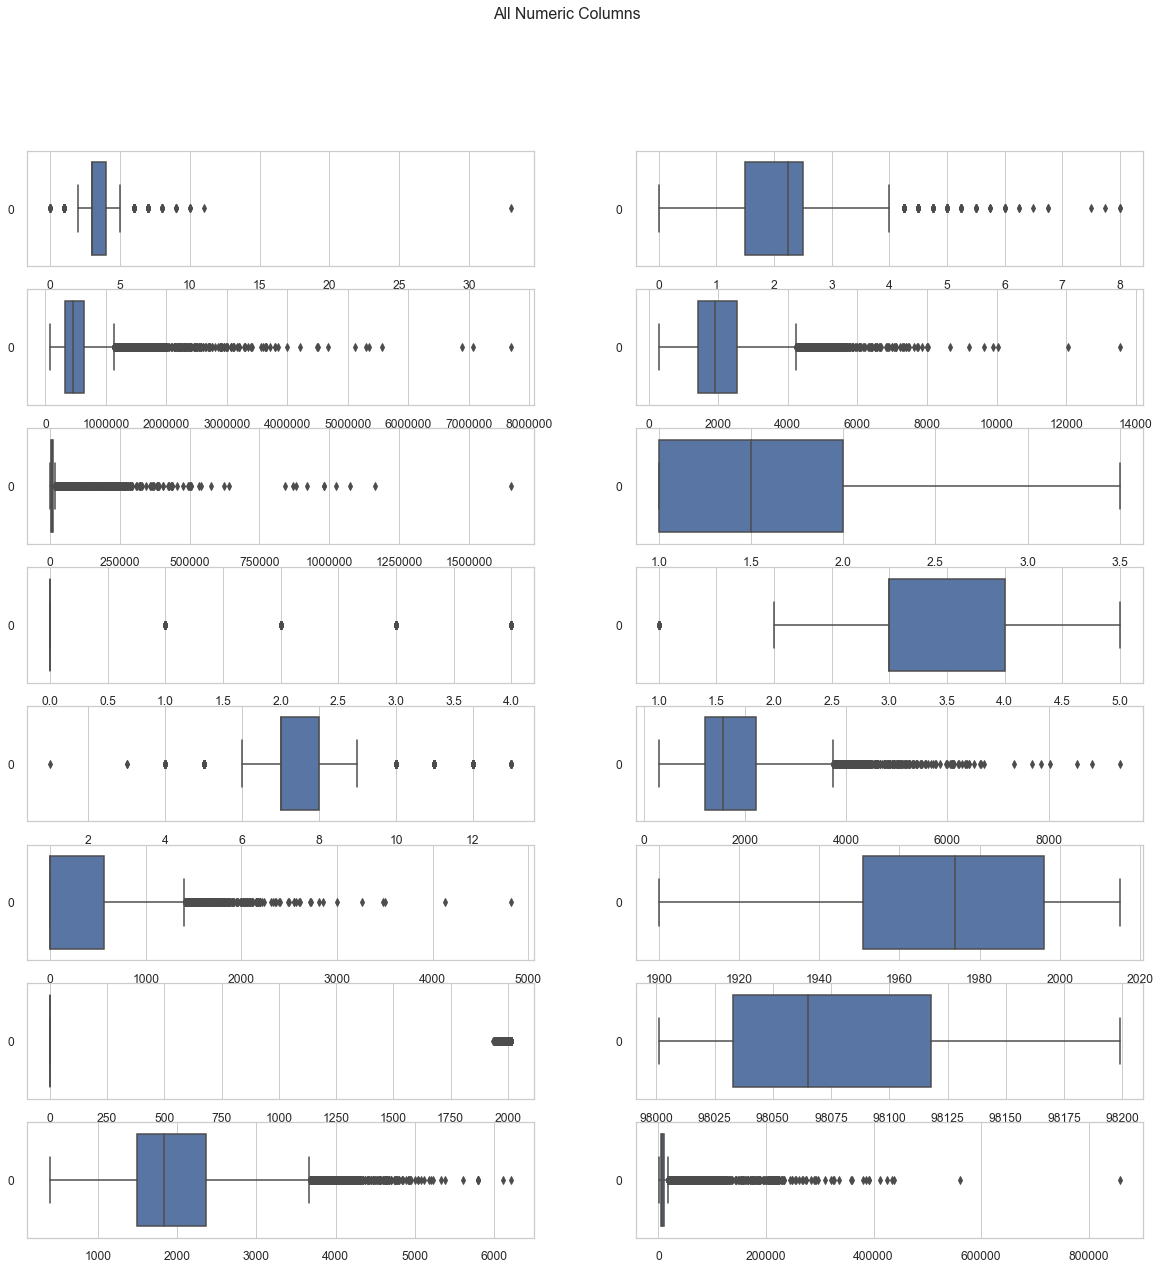

In [8]:
fig, axes = plt.subplots(8,2, figsize=(20,20)) 
fig.suptitle('All Numeric Columns')

sns.boxplot(ax=axes[0, 0], data=h['bedrooms'], orient='h')
sns.boxplot(ax=axes[0, 1], data=h['bathrooms'], orient='h')

sns.boxplot(ax=axes[1, 0], data=h['price'], orient='h') 
sns.boxplot(ax=axes[1, 1], data=h['sqft_living'], orient='h') 

sns.boxplot(ax=axes[2, 0], data=h['sqft_lot'], orient='h')
sns.boxplot(ax=axes[2, 1], data=h['floors'], orient='h')

sns.boxplot(ax=axes[3, 0], data=h['view'], orient='h') 
sns.boxplot(ax=axes[3, 1], data=h['condition'], orient='h')  

sns.boxplot(ax=axes[4, 0], data=h['grade'], orient='h')
sns.boxplot(ax=axes[4, 1], data=h['sqft_above'], orient='h')

sns.boxplot(ax=axes[5, 0], data=h['sqft_basement'], orient='h') 
sns.boxplot(ax=axes[5, 1], data=h['yr_built'], orient='h') 

sns.boxplot(ax=axes[6, 0], data=h['yr_renovated'], orient='h')
sns.boxplot(ax=axes[6, 1], data=h['zipcode'], orient='h')

sns.boxplot(ax=axes[7, 0], data=h['sqft_living15'], orient='h') 
sns.boxplot(ax=axes[7, 1], data=h['sqft_lot15'], orient='h') 

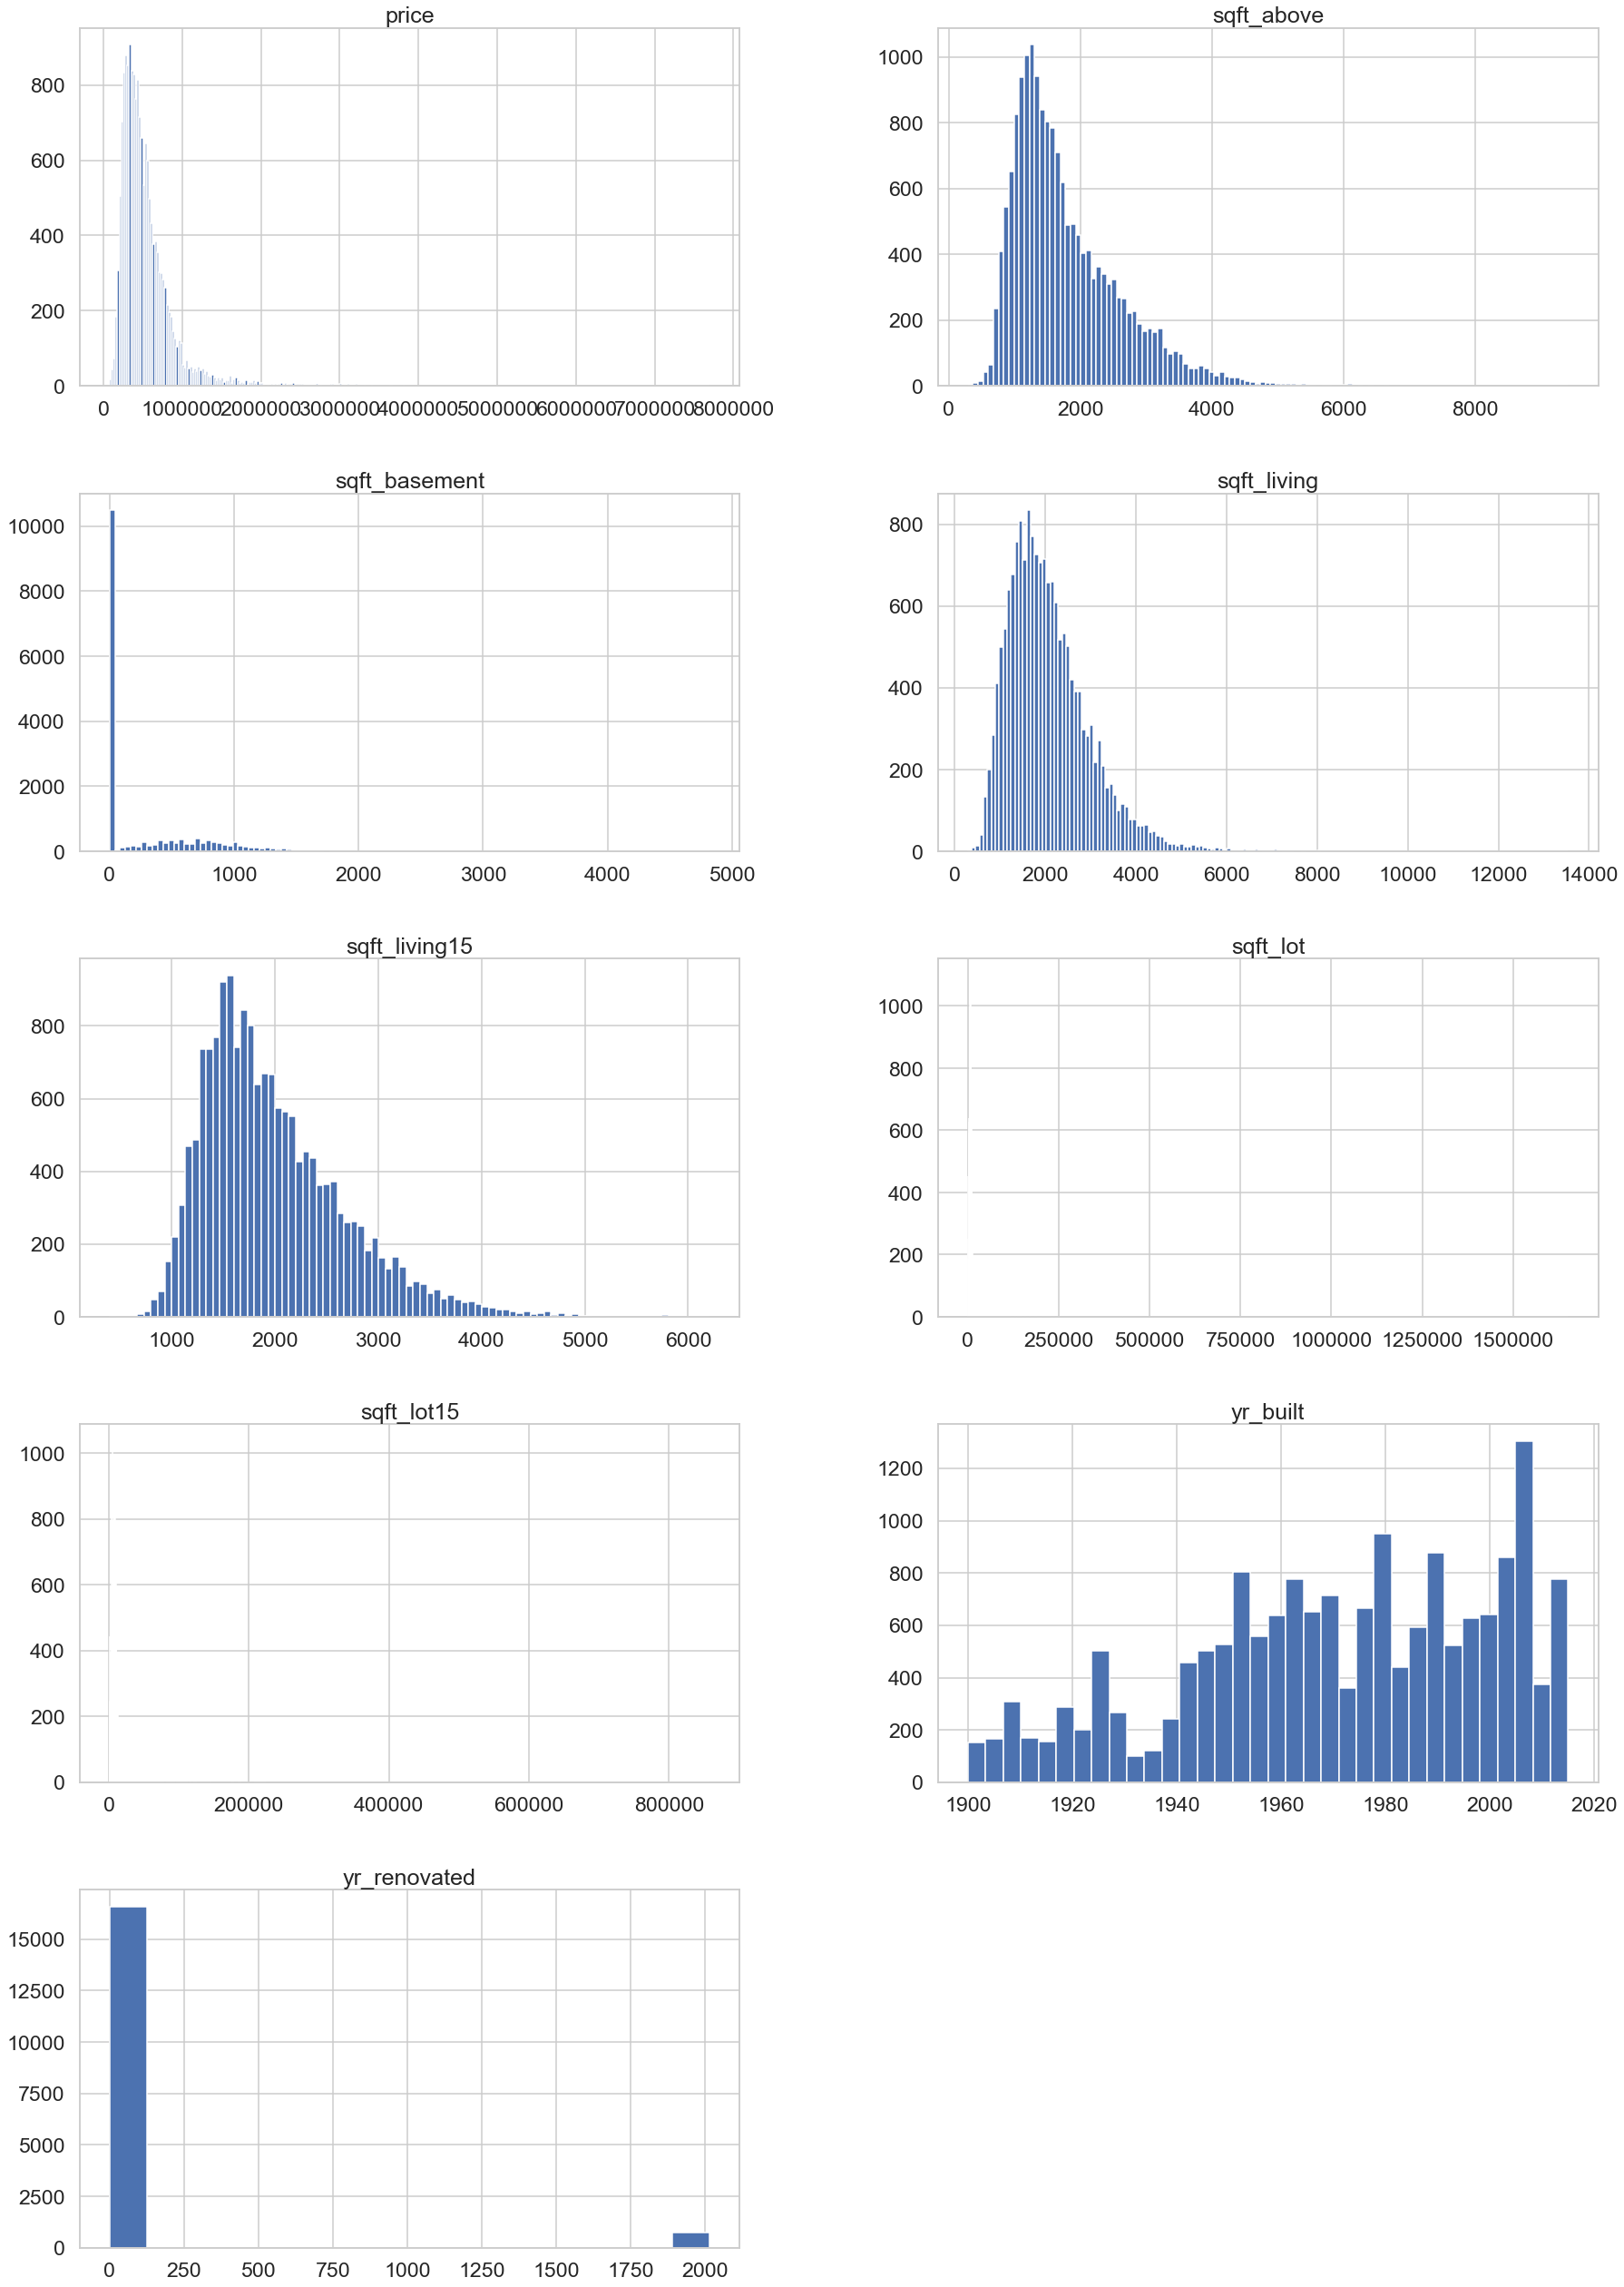

In [9]:
sns.set_context("talk", font_scale=1.4)
h[numerical].hist(bins='auto', figsize=(30, 45), layout=(5, 2));

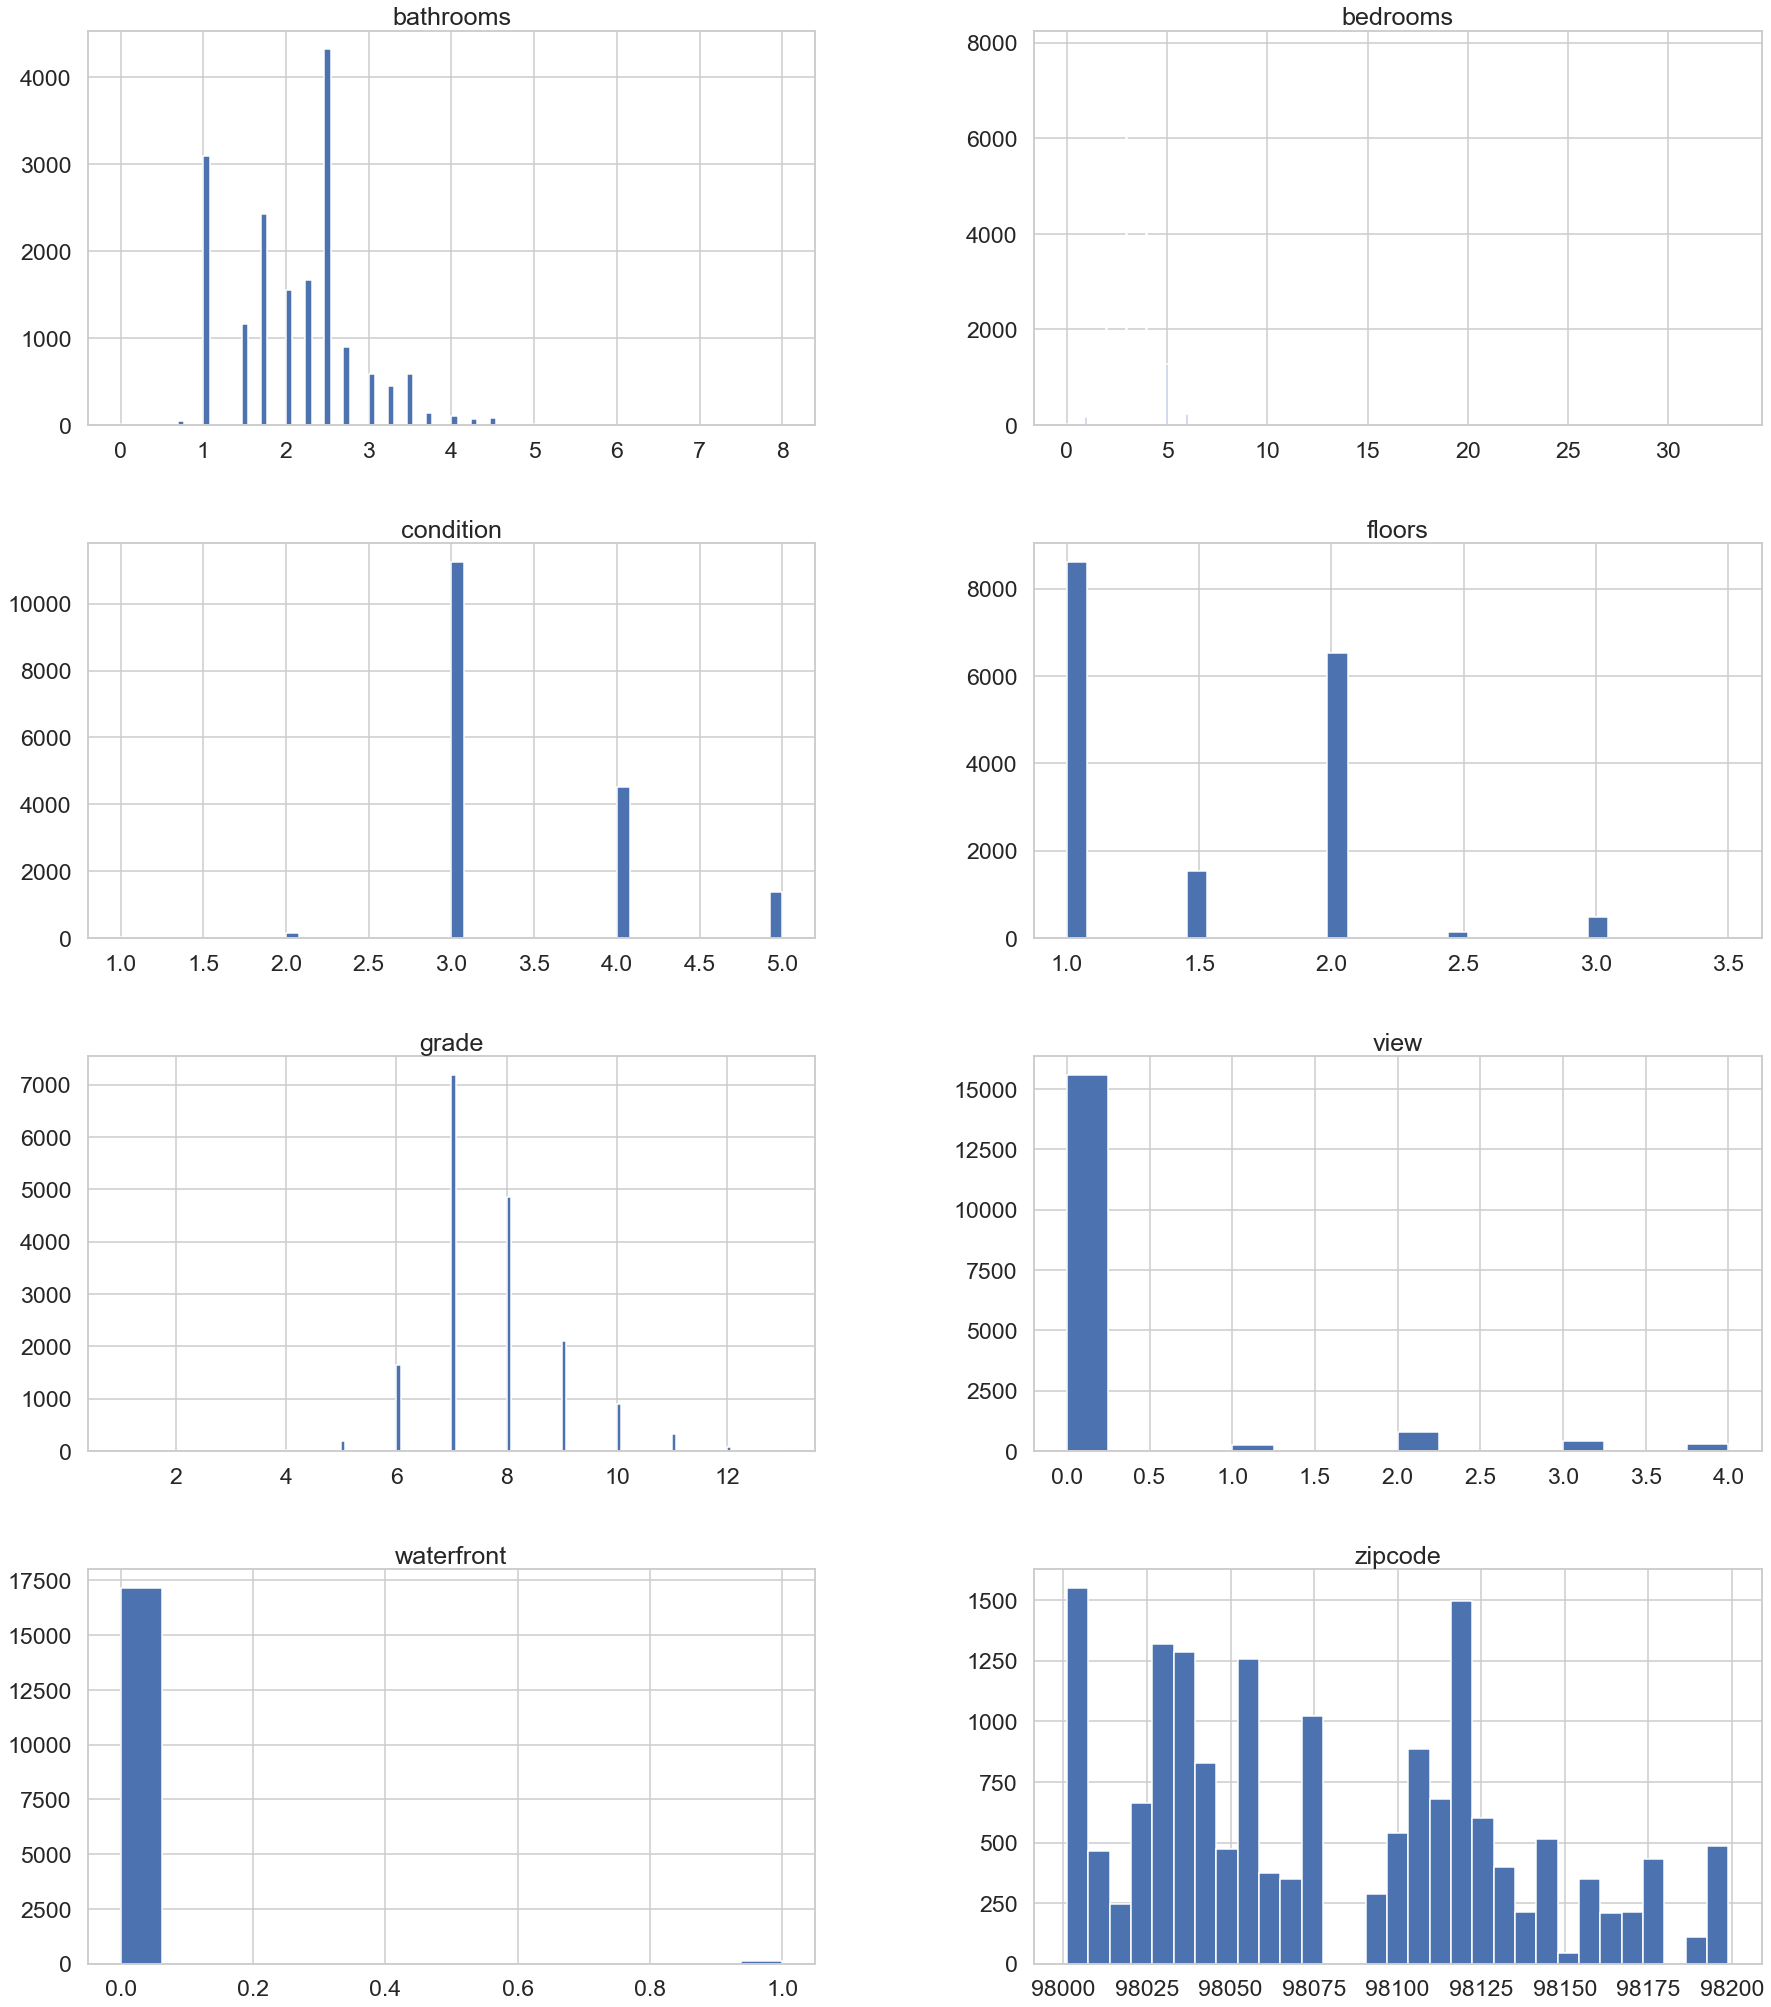

In [10]:
sns.set_context("talk", font_scale=1.4)
h[categorical].hist(bins='auto', figsize=(30, 45), layout=(5, 2));

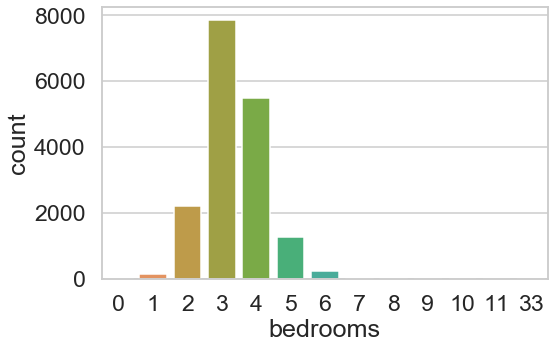

In [11]:
sns.set_context("talk", font_scale=1.4)
sns.countplot(h['bedrooms']);

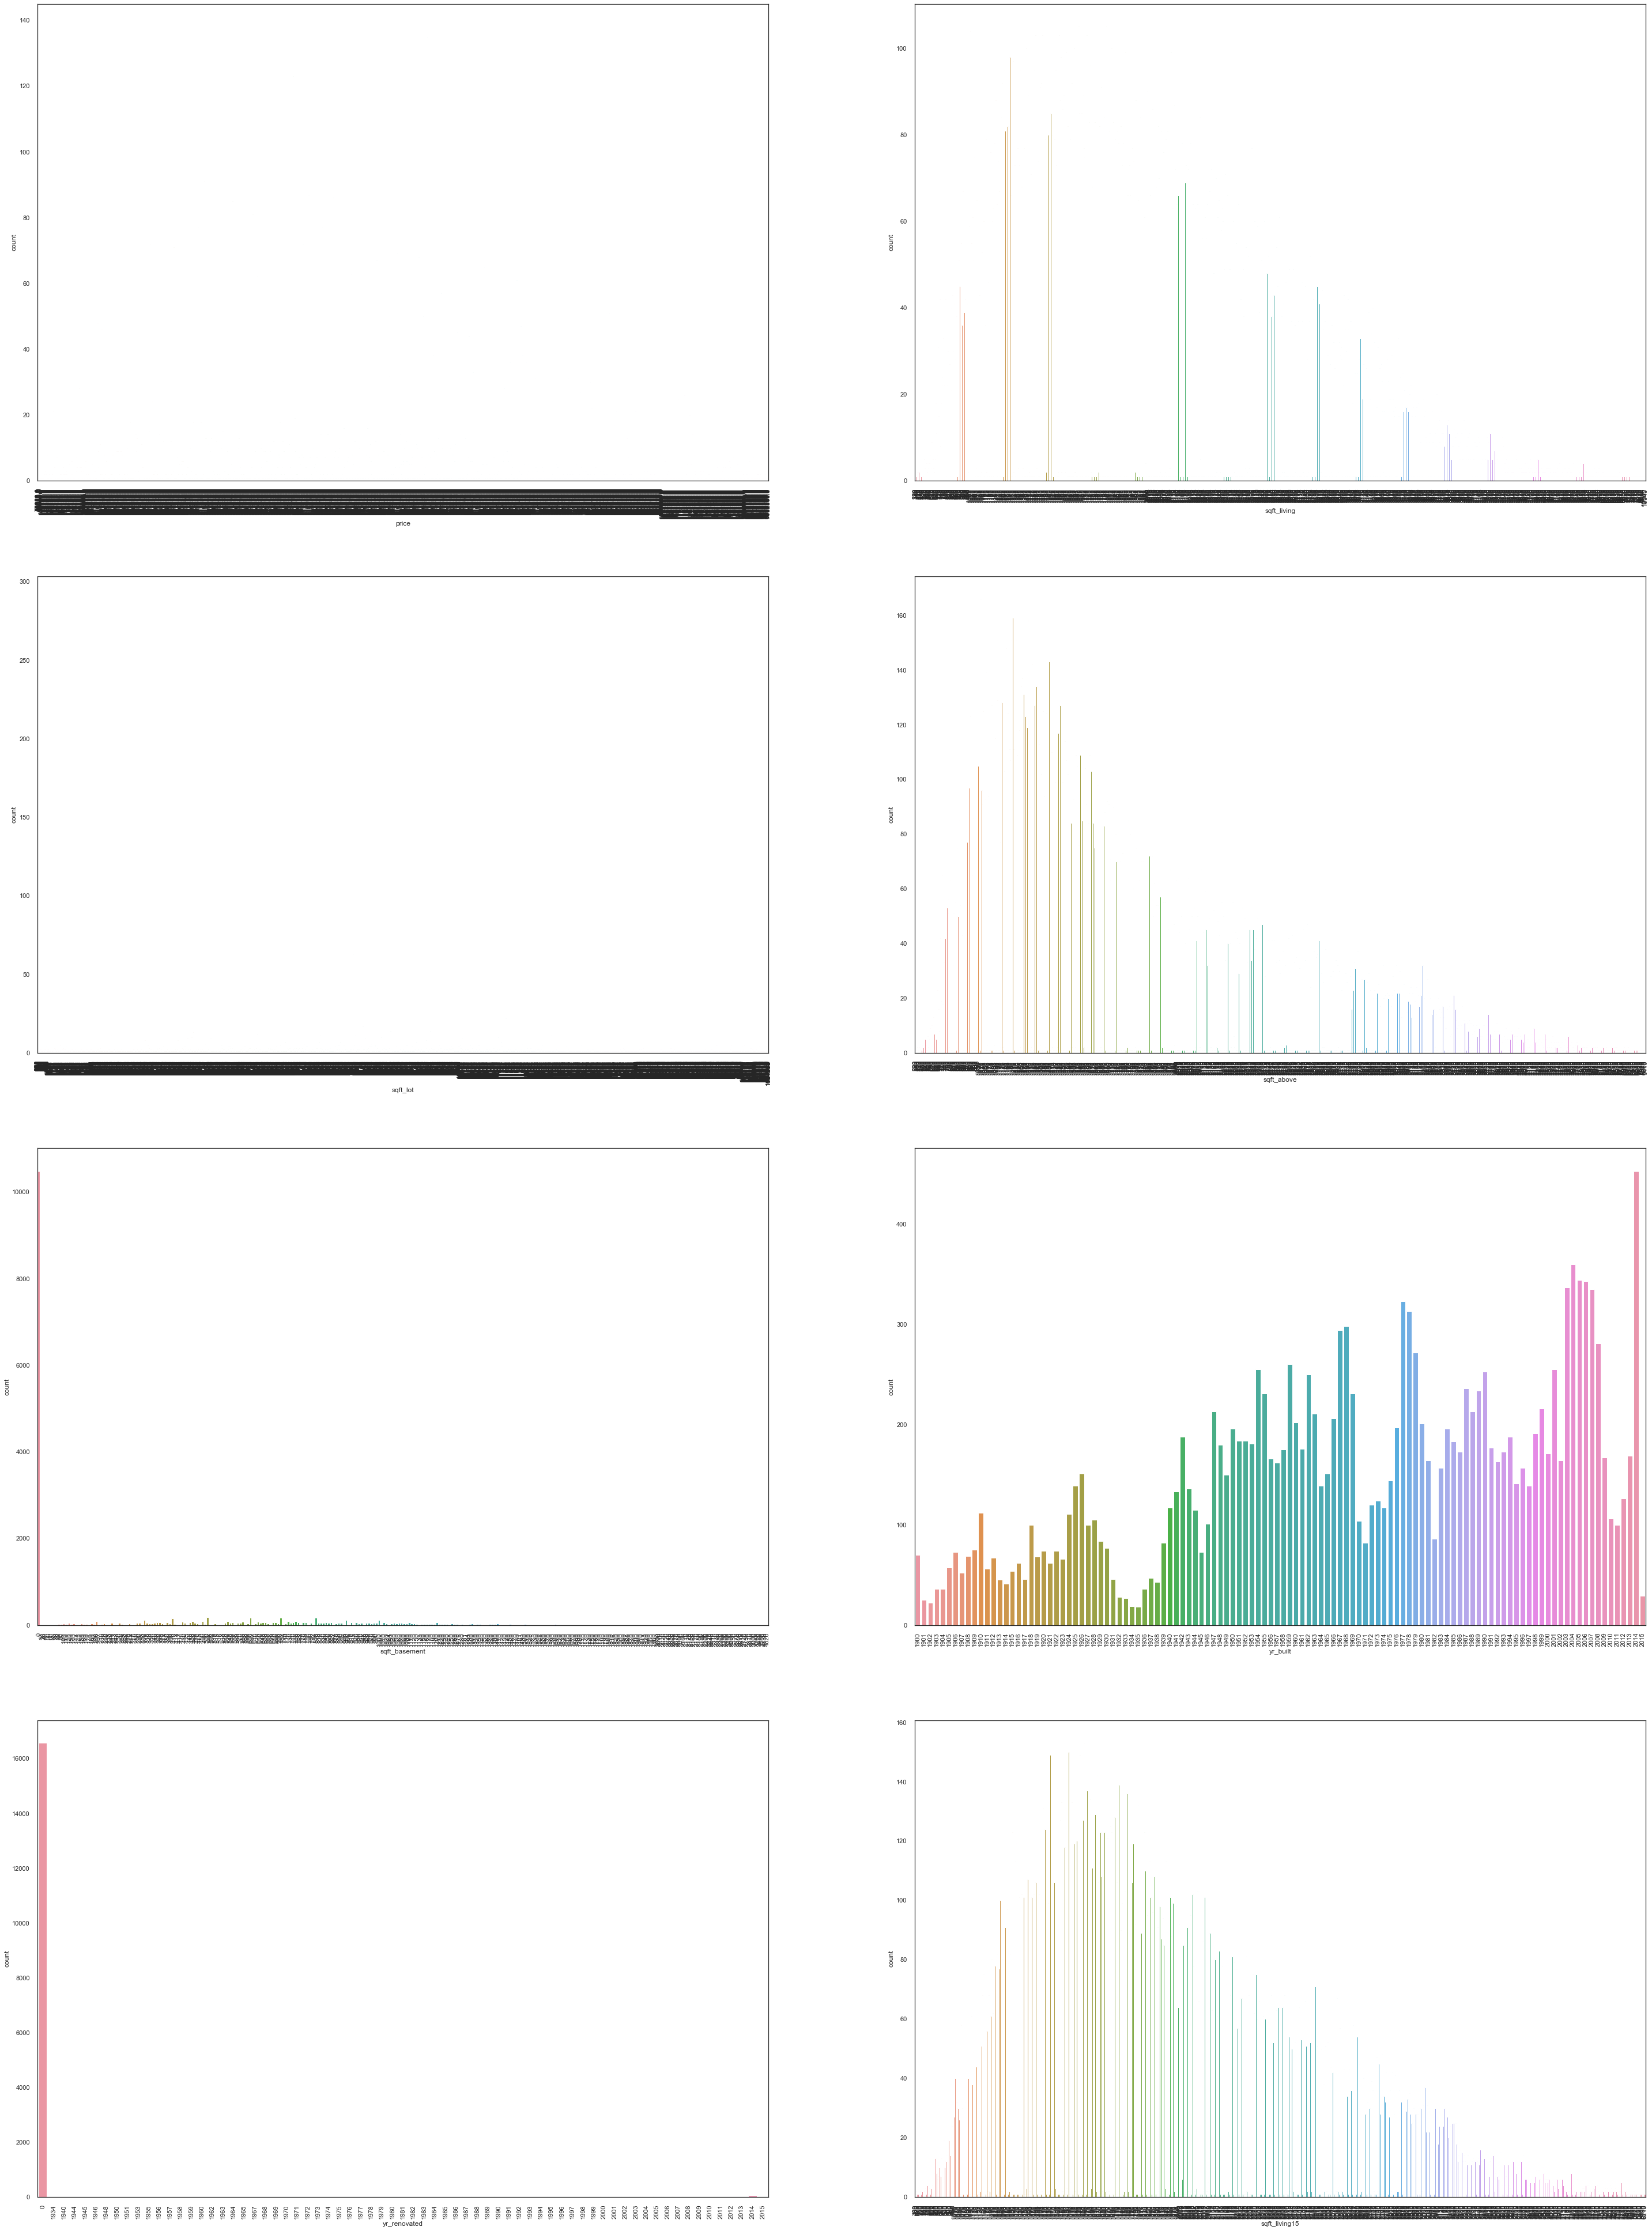

In [84]:
fig, ax = plt.subplots(10, 2, figsize=(50, 70))
for variable, subplot in zip(hfil, ax.flatten()):
    sns.countplot(h[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [13]:
test1 = pd.DataFrame(h[h['bedrooms'] > 0].groupby('bathrooms')['bedrooms'].value_counts()) 
test1

bedrooms
bathrooms bedrooms          
0.00      1                2
0.50      1                1
          2                1
          4                1
0.75      1               20
...                      ...
6.75      7                1
7.50      9                1
7.75      6                1
8.00      6                1
          7                1

[135 rows x 1 columns]

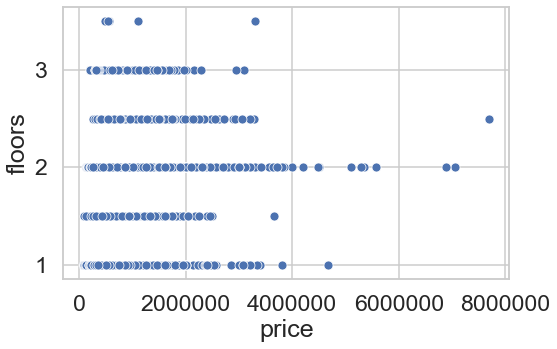

In [14]:
sns.scatterplot(x=h['price'], y=h['floors']);

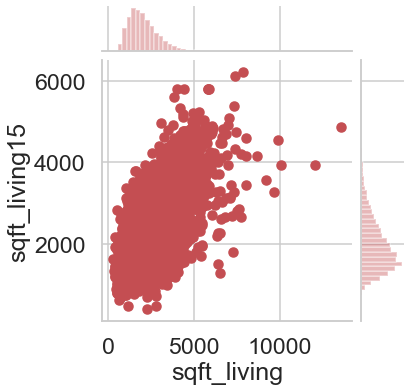

In [15]:
sns.jointplot(x=h['sqft_living'], y=h['sqft_living15'], color='r');

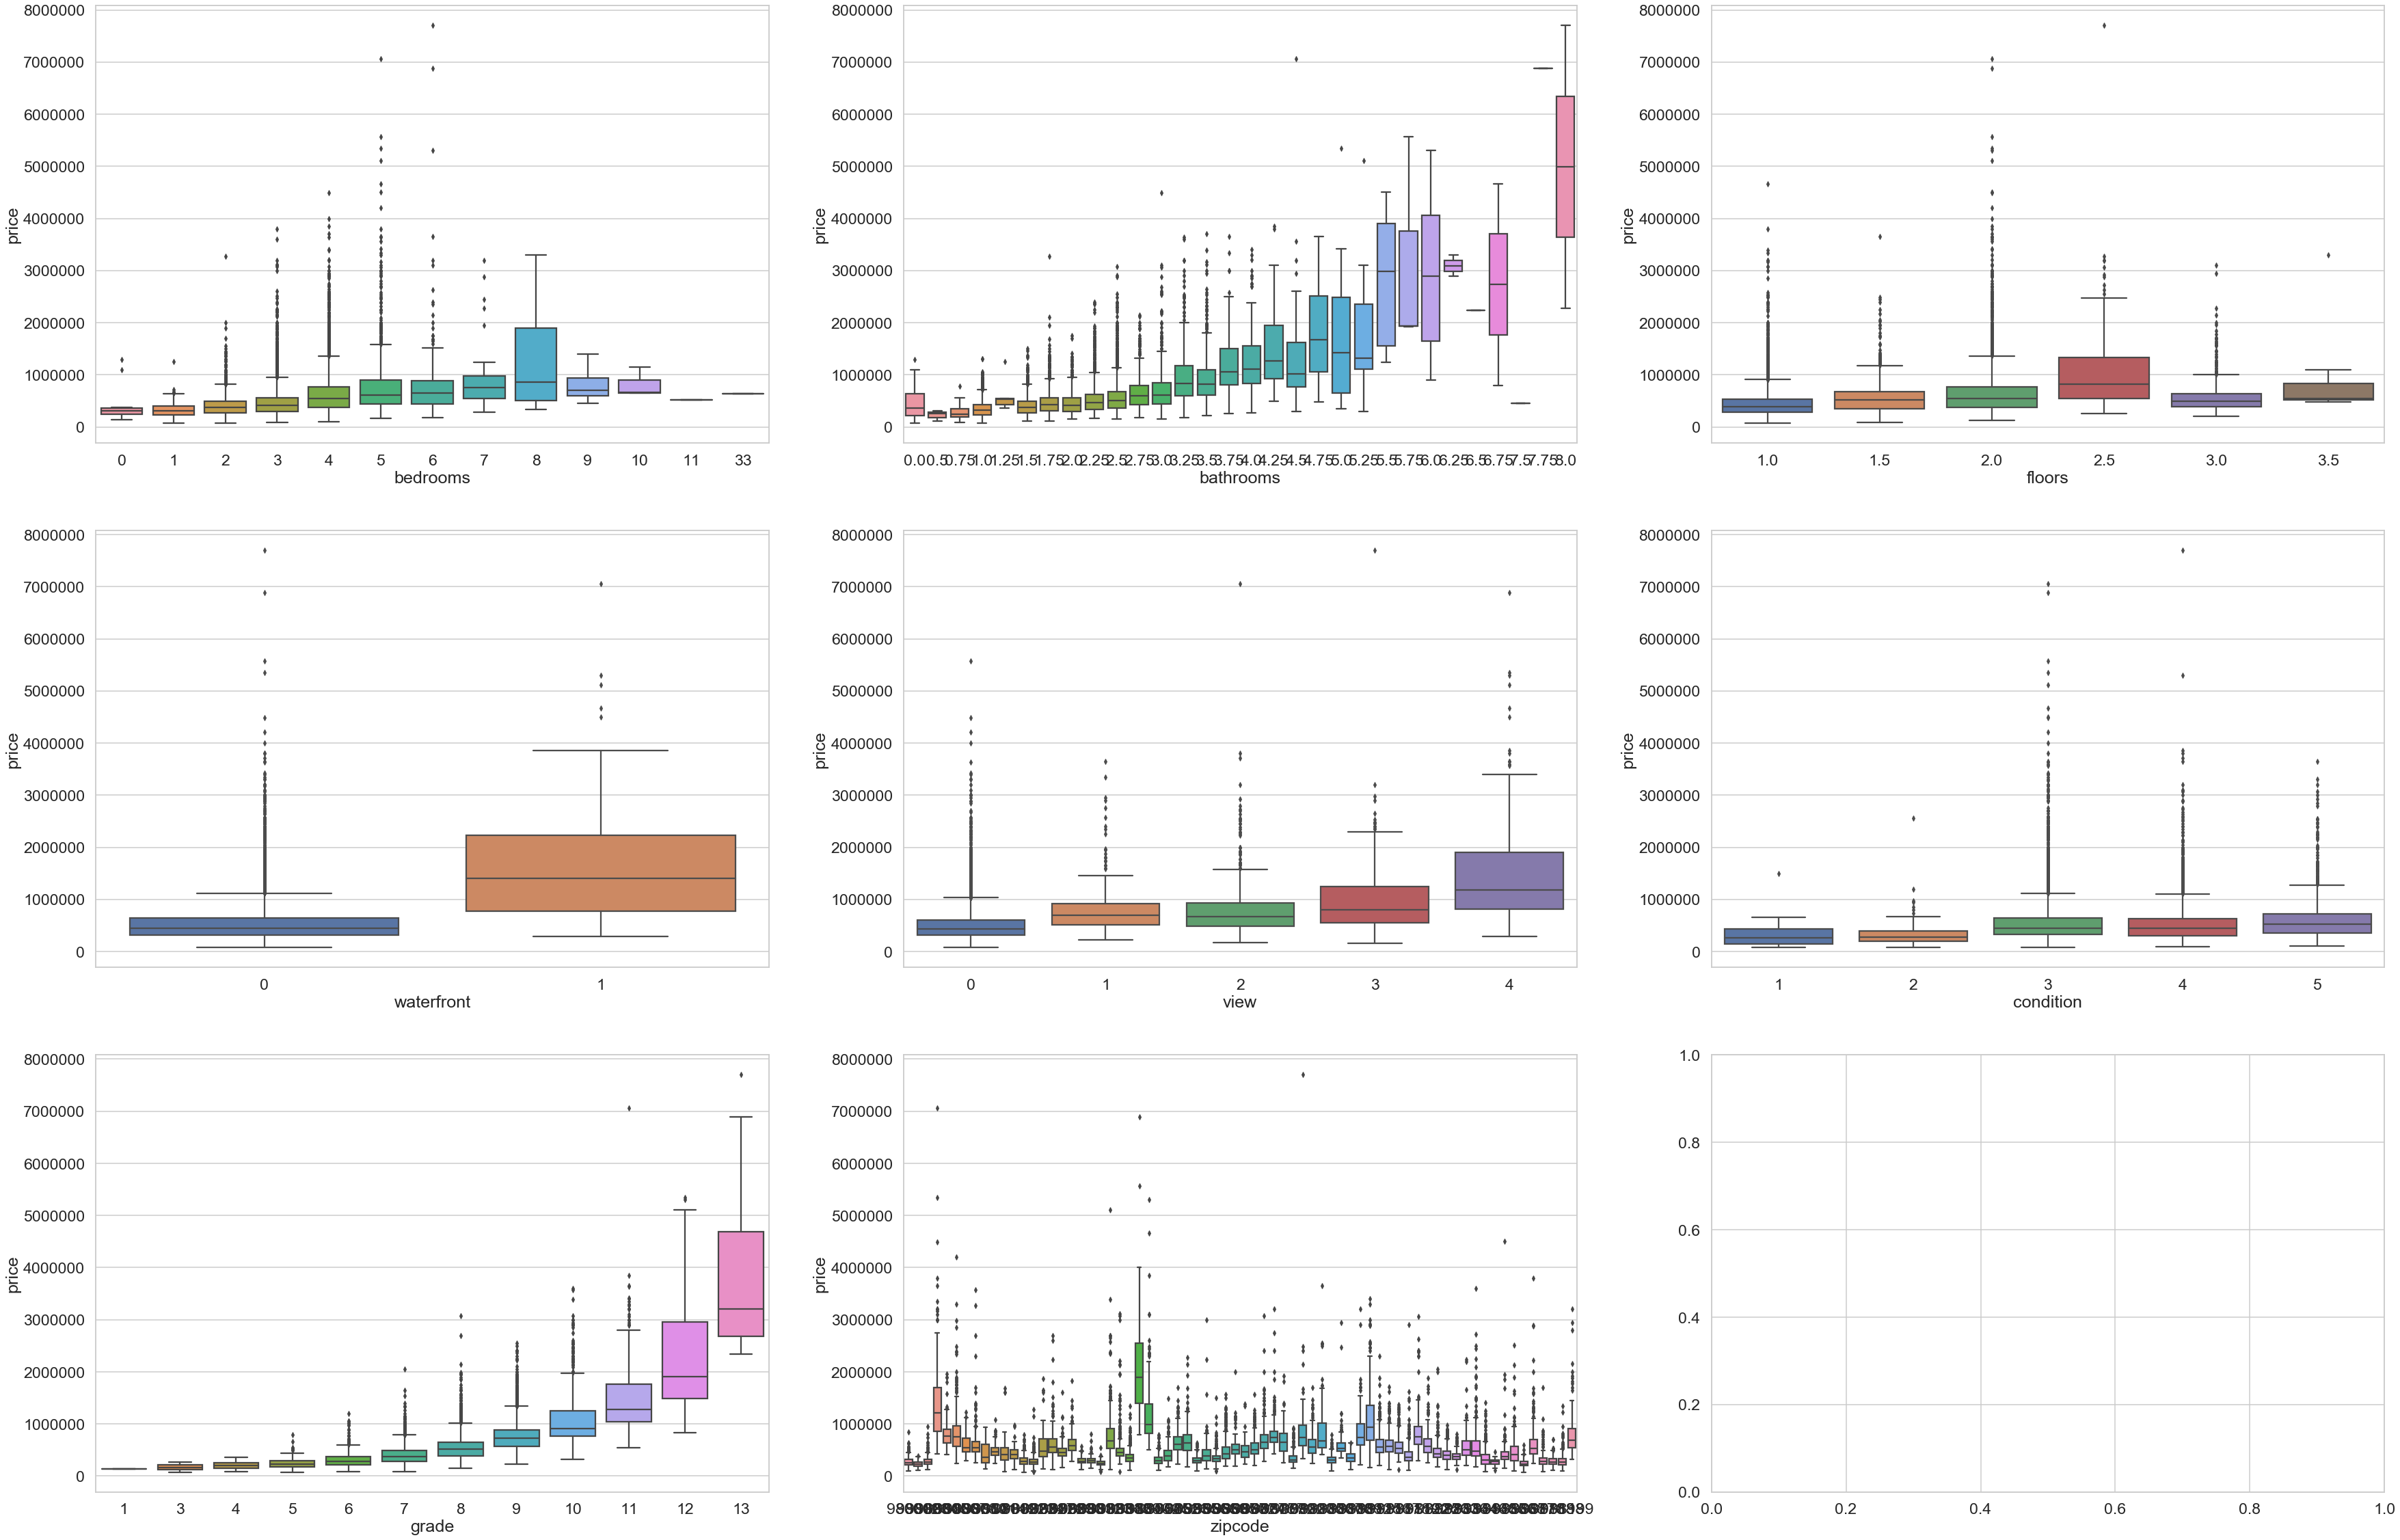

In [17]:

fig, ax = plt.subplots(3, 3, figsize=(60, 40))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='price', data=h, ax=subplot)

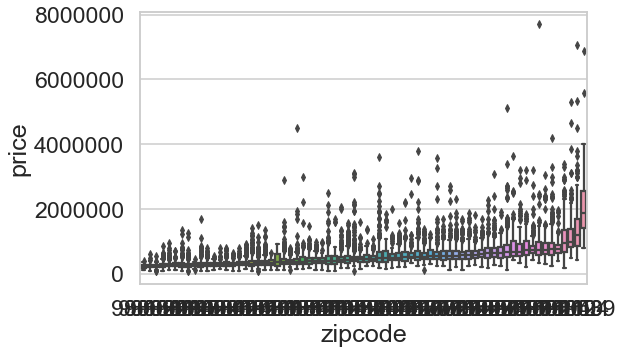

In [18]:

sorted_nb = h.groupby(['zipcode'])['price'].median().sort_values()
sns.boxplot(x=h['zipcode'], y=h['price'], order=list(sorted_nb.index))

In [58]:
#Explored varios columns to find where to cap things
priceu = h.loc[(h['price']>=3200000)] 
len(priceu)

34

In [57]:
pricel = h.loc[(h['price']<=110000)] 
len(pricel)

39

In [56]:
bd = h.loc[(h['bedrooms']>=7)] 
len(bd)

50

In [55]:
ba = h.loc[(h['bathrooms']>=5)] 
len(ba)

53

In [62]:
sqli = h.loc[(h['sqft_living']>=6500)] 
len(sqli)

41

In [65]:
sqlo = h.loc[(h['sqft_lot']>=420000)] 
len(sqlo)

31

In [81]:
fl = h.loc[(h['floors']>=3)] 
len(fl)

482

In [70]:
sqab = h.loc[(h['sqft_above']>=5700)] 
len(sqab)

33

In [71]:
sqba = h.loc[(h['sqft_basement']>=2150)] 
len(sqba)

38

In [29]:
import descartes
import geopandas as gpd
import fiona
from shapely.geometry import Point, Polygon

In [30]:
zipfile = 'Zip_Codes-shp' 
streetmap = gpd.read_file(zipfile) 
crs = {'init': 'epsg:4326'}

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
IllegalArgumentException: geometries must not contain null elements

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
IllegalArgumentException: geometries must not contain null elements

Shell is not a LinearRing
Shell is not a LinearRing
IllegalArgumentException: geometries must not contain null elements

Shell is not a LinearRing
Shell is not a LinearRing
IllegalArgumentException: geometries must not contain null elements

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Hole is not a LinearRi

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
IllegalArgumentException: geometries must not contain null elements

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
IllegalArgumentException: geometries must not contain null elements

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
IllegalArgumentException: geometries must not contain null elements

Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not a LinearRing
Shell is not 

CRSError: Invalid projection: epsg:4326: (Internal Proj Error: proj_create: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name)

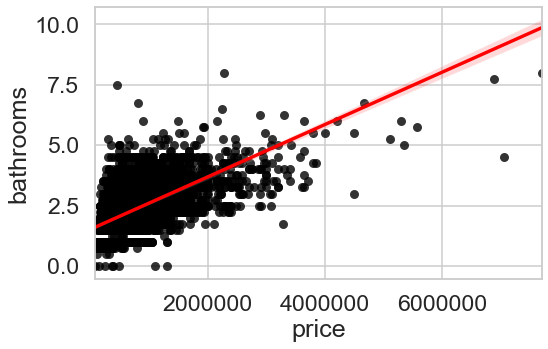

In [21]:
sns.regplot(h['price'],h['bathrooms'], scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [75]:
price_corr = h[h.columns[:]].corr()['price'][:] 
price_corr.sort_values()

zipcode         -0.048958
id              -0.015644
Unnamed: 0      -0.012306
long             0.019327
condition        0.036099
yr_built         0.056450
sqft_lot15       0.081423
sqft_lot         0.086803
yr_renovated     0.117770
floors           0.256985
waterfront       0.275779
lat              0.302394
bedrooms         0.305106
sqft_basement    0.323312
view             0.395485
bathrooms        0.524335
sqft_living15    0.585567
sqft_above       0.607760
grade            0.666215
sqft_living      0.703540
price            1.000000
Name: price, dtype: float64

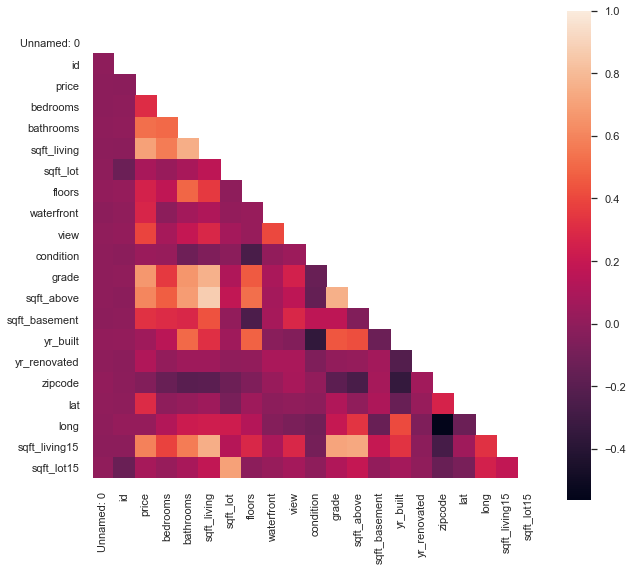

In [74]:
plt.style.use('seaborn')
sns.set(style="white") 


f, ax = plt.subplots(figsize=(10, 9))

mask = np.zeros_like(h.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(h.corr(), mask=mask, square=True)
b, t = plt.ylim() 
b += .5
t -= .5 
plt.ylim(b, t) 
plt.show() 

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [90]:
h.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [ ]:
# your code here

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [ ]:
#your code here

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [ ]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [ ]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [ ]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [ ]:
#your code here 

### 5.2) Fit your scaler to training the data.

In [ ]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [ ]:
#your code here 

### 5.4) Fit the model to the training data.

In [ ]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [ ]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [ ]:
#your code here 

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [ ]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [ ]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/